## Cálcular de estimadores estadísticos con Python

Supongamos que hacemos una toma de datos y el promedio es igual a 20.0, con una desviación típica de 2.0. Además, los datos están normalmente distribuido. Con las siguientes instrucciones se obtiene una muestra de la población con dichas características

In [1]:
import numpy as np  # importa numpy
import matplotlib.pyplot as plt  #importa las herramientas para graficar
import pandas as pd

In [2]:
prom = 20.0  #mu
DT = 2.0  #sigma
np.random.normal(prom, DT)

22.910171151277538

Ahora simularemos un experimento donde se toman diez muestras de la población antes mencionada

In [3]:
N = 10
muestras = np.random.normal(prom, DT, N)
print(muestras)

[17.40540372 23.65165367 24.08465752 20.28559884 20.3627461  19.11952228
 19.3674702  20.72253144 22.0444817  20.60800532]


# Ejercicio

Ahora calcularemos el promedio y la desvición típica de las muestras obtenidas

In [4]:
np.mean(muestras)

20.76520707948462

In [5]:
np.std(muestras)

1.932760375086876

Implementaremos la distribución estándar en el paquete <code>scipy.stats</code> mediante el comando <code>scipy.stats.norm</code>. La documentación de este comando [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html) menciona que puede ser usado con una o tres variables.

La versión de una variable está definida por la siguiente ecuación:

$$f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right),$$

lo cual equivale a que $\mu=0$ y $\sigma=1$ en la definición dada anteriormente. las versión de tres variables reemplaza $f(x)$ con $f((x-l)/s)/s$ lo cual resulta en:

$$f(x)=\frac{1}{\sqrt{2\pi s^2}}\exp\left(-\frac{(x-l)^2}{2s^2}\right),$$

donde $l$ y $s$ son los parametros llamados ubicación y escala, respectivamente ($l$ y $s$ se llaman <code>loc</code> y <code>scale</code>, respectivamente en la documentación). Esta ecuación equivale a la definición dada anteriormente, pero con $\mu=l$ y $\sigma=s$. Así que, los parámetros de ubicación y escala se pueden interpretar como la media y la desviación típica respectivamente.

In [6]:
# Para el caso de omitir el uso de SCIPY, tendriamos que hacer el cálculo mediante la programación de la fórmula, quedando algo similar a esto: 

def NormalPDF(x, m, s):  #NormalPDF es función de x y toma los parámetros m y s
    return np.exp(-(x - m) ** 2 / (2 * s ** 2)) / (
            2 * np.pi * s ** 2) ** 0.5  #Definición de la función normal de probabilidad

A continuación se grafica la distribución con los parámetros $\mu=20$ y $\sigma=2$ usando <code>scipy.stats</code>:

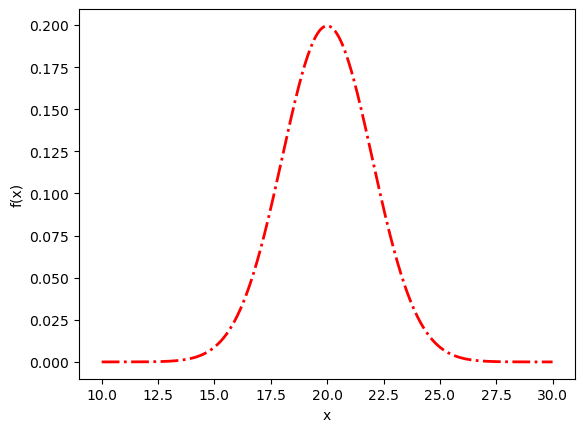

In [7]:
from scipy import stats  #Importa scipy

x = np.linspace(10, 30, 500)  #Definición de los valores de x
sy = stats.norm.pdf(x, 20, 2)  #calcula los valores de "y"

plt.plot(x, sy, color='r', linewidth=2, linestyle='-.')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

# Ejercicio
Utilice los comandos de numpy para calcular la media y la desviación estándar con N = 10, N = 100 y N = 1000,
Realice las gráficas para cada N diferente.

In [8]:
# Con N = 10

N = 10
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[19.61369406 20.32681068 20.67762521 20.56240267 16.70686893 20.37474347
 19.23093864 20.33366648 22.3175995  20.49911109]
Promedio de las muestras: 20.06
Desviación estándar de las muestras: 1.35


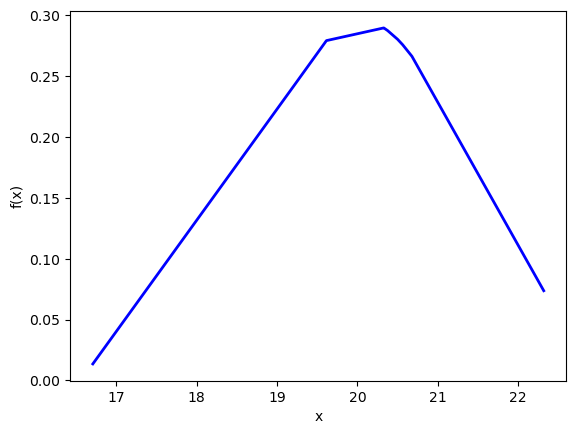

In [9]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='b', linewidth=2, linestyle='-')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

In [10]:
# Con N = 100

N = 100
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[18.31123999 18.83952186 21.04542425 19.29815776 19.06967693 20.56263444
 17.91679582 21.11229343 17.06080273 19.27816674 18.89954743 18.29933923
 17.27613917 21.09988189 21.21599073 21.46243699 23.22994736 17.87222356
 16.60709119 19.53852448 17.69413951 22.88202078 18.60717212 19.17511725
 21.12126343 19.27260703 19.4032081  20.34639075 16.00882512 19.18402245
 20.31670482 18.0654715  18.47546255 20.23811819 16.98179867 17.56653168
 20.10782781 15.55507822 18.10679939 19.31309982 17.8719251  17.95569623
 21.20484792 20.58683512 17.53989838 22.04850955 22.01083944 19.38865962
 22.56193854 21.08365898 23.32396826 20.9500379  18.80741272 19.07128313
 23.56070366 14.61668055 20.14252338 20.68875768 20.94269792 20.37250027
 18.68073151 16.91556139 21.35855093 19.71317657 21.18387651 24.02106766
 18.05435165 16.0873005  20.68601397 18.85128957 17.83682695 20.34195802
 19.40847791 16.56259242 20.14257979 21.70979099 23.33626805 16.94298214
 19.00706448 15.4951016  22.38496005 24.3

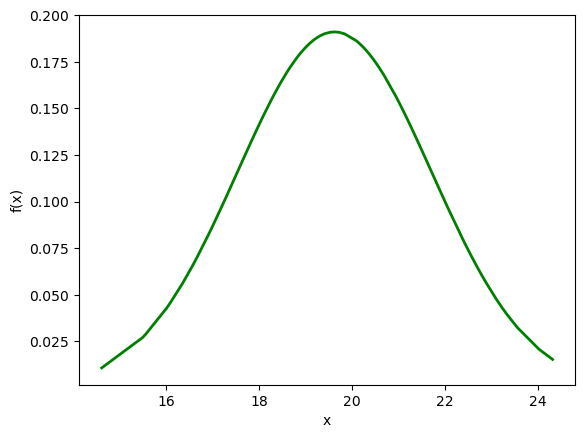

In [11]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='g', linewidth=2, linestyle='-')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

In [12]:
# Con N = 1000

N = 1000
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[18.51660103 14.87889615 21.50732347 21.76418008 22.91773188 15.14626517
 18.76683874 19.84768012 23.2507652  22.46755662 21.51336323 18.75735014
 17.59082082 18.90330088 17.61833009 19.63411069 22.73118533 19.45570605
 20.23132937 18.94987711 19.26175915 19.20847691 19.94478633 19.34499506
 17.74366387 16.47720562 18.43728171 17.2178701  19.68481688 17.28510658
 22.84028313 19.2866844  18.9695885  18.84670541 21.48982526 16.60819888
 22.31689135 20.20292282 18.92684861 18.45637064 17.71392848 20.45224544
 19.66270712 23.00649419 20.65883447 17.32756673 18.46651658 17.4756098
 20.44368222 23.27028148 19.61169869 21.11128842 17.21557798 19.76671198
 19.30862765 17.49182084 12.39407051 21.15466452 21.13091278 20.80628459
 22.62369966 20.89773596 20.22376722 19.79812182 22.24127178 19.39232037
 19.77847415 22.09545277 20.47799176 20.6885316  22.66162301 20.05783811
 22.13642326 22.2175791  20.14388817 21.41428555 20.67889694 22.34877291
 21.42766636 19.36950691 19.35636085 18.66

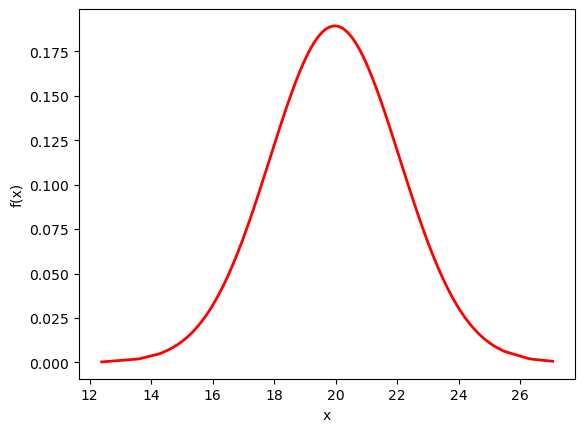

In [13]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='r', linewidth=2, linestyle='-')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

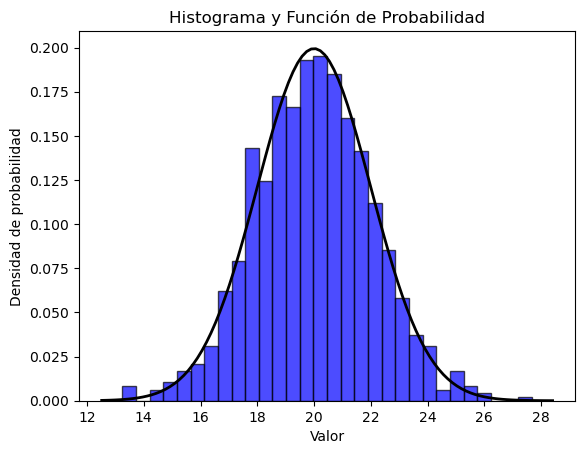

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generar las muestras
N = 1000
muestras = np.random.normal(20, 2, N)

# Crear el histograma de las muestras
plt.hist(muestras, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Añadir una línea que represente la función de densidad de probabilidad
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 20, 2)
plt.plot(x, p, 'k', linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Función de Probabilidad')

# Mostrar el gráfico
plt.show()